In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
#redoing everything after getting rid of any outliers

df_outliers = pd.read_csv('listings.csv')
df_outliers.dropna()


df_outliers = df_outliers[df_outliers['price'].notnull()]
df_outliers = df_outliers[df_outliers['price'] > 0]

if df_outliers['price'].dtype == object:
    df_outliers['price'] = df_outliers['price'].replace(r'[\$,]', '', regex=True).astype(float)

df_outliers = df_outliers.dropna(subset=['room_type', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews'])





In [ ]:
#Remove outliers using IQR method
Q1 = df_outliers['price'].quantile(0.25)
Q3 = df_outliers['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outliers_filtered = df_outliers[(df_outliers['price'] >= lower_bound) & (df_outliers['price'] <= upper_bound)]


print(f"Removed {len(df_outliers) - len(df_outliers_filtered)} outliers.")

Removed 792 outliers.


In [ ]:
#how many listings in each neighborhood
neighborhood_counts = df_outliers_filtered['neighbourhood'].value_counts()

print(neighborhood_counts[:10])


neighbourhood
la Dreta de l'Eixample                   1730
el Raval                                 1136
la Vila de Gràcia                         878
la Sagrada Família                        870
el Barri Gòtic                            865
Sant Pere, Santa Caterina i la Ribera     831
l'Antiga Esquerra de l'Eixample           809
Sant Antoni                               761
el Poble Sec                              709
la Nova Esquerra de l'Eixample            602
Name: count, dtype: int64


In [54]:
neighbourhood_df = df_outliers_filtered[df_outliers_filtered['neighbourhood'] == "la Dreta de l'Eixample"]
print(neighbourhood_df[:5])

        id                                               name  host_id  \
6    40983                   Soho Colonial Eclectic Apartment   177617   
12   71553     Best deals for penthouse near Sagrada Familia!   366654   
22   89776        Modernist aparment in the heart of the city  3556337   
40  188267  LAST Minute Promotion ,Balconies  and views, city   366654   
60  268017              Sweett |  Charming 3BR near Casa Mila  1405013   

                          host_name neighbourhood_group  \
6                           Joaquin            Eixample   
12  Watermelon Barcelona Apartments            Eixample   
22                        Alejandro            Eixample   
40  Watermelon Barcelona Apartments            Eixample   
60                          Midtown            Eixample   

             neighbourhood  latitude  longitude        room_type  price  \
6   la Dreta de l'Eixample  41.39631    2.16832  Entire home/apt  149.0   
12  la Dreta de l'Eixample  41.39705    2.17469  E

In [55]:
# how many listing for each room type

#counting each unique value
room_type_count = df_outliers_filtered['room_type'].value_counts()

print(room_type_count)

room_type
Entire home/apt    9723
Private room       4640
Hotel room           68
Shared room          50
Name: count, dtype: int64


In [56]:
room_type_df = df_outliers_filtered[df_outliers_filtered['room_type'] == 'Entire home/apt']

print(room_type_df[:5])

      id                                               name  host_id  \
0  18674    Huge flat for 8 people close to Sagrada Familia    71615   
1  23197  Forum CCIB DeLuxe, Spacious, Large Balcony, relax    90417   
2  32711                   Sagrada Familia area - Còrsega 1   135703   
3  34241   Stylish Top Floor Apartment - Ramblas Plaza Real    73163   
6  40983                   Soho Colonial Eclectic Apartment   177617   

        host_name neighbourhood_group                       neighbourhood  \
0   Mireia  Maria            Eixample                  la Sagrada Família   
1  Etain (Marnie)          Sant Martí               el Besòs i el Maresme   
2            Nick              Gràcia  el Camp d'en Grassot i Gràcia Nova   
3          Andres        Ciutat Vella                      el Barri Gòtic   
6         Joaquin            Eixample              la Dreta de l'Eixample   

    latitude  longitude        room_type  price  minimum_nights  \
0  41.405560    2.17262  Entire home/

In [ ]:
# Count listings in each unique neighborhood
room_nei_counts_ = neighbourhood_df['room_type'].value_counts()

print(room_nei_counts_[:10])



room_type
Entire home/apt    1108
Private room        589
Hotel room           18
Shared room          15
Name: count, dtype: int64


In [58]:
neighbourhood_roomtype_df = neighbourhood_df[neighbourhood_df['room_type'] == "Entire home/apt"]

In [ ]:
#One-hot encode 'room_type'
#print(df.columns)

room_dummies = pd.get_dummies(df_outliers_filtered['room_type'], prefix='room')
df_outliers_filtered = pd.concat([df_outliers_filtered, room_dummies], axis=1)
df_outliers_filtered.drop('room_type', axis=1, inplace=True)

print(room_dummies[:10])



    room_Entire home/apt  room_Hotel room  room_Private room  room_Shared room
0                   True            False              False             False
1                   True            False              False             False
2                   True            False              False             False
3                   True            False              False             False
5                  False            False               True             False
6                   True            False              False             False
7                   True            False              False             False
8                   True            False              False             False
9                   True            False              False             False
10                  True            False              False             False


In [ ]:

features = ['number_of_reviews', 'minimum_nights', 'availability_365',
                'room_Entire home/apt', 'room_Private room', 'room_Shared room', 'room_Hotel room'] + list(room_dummies.columns)
X = df_outliers_filtered[features]
y = df_outliers_filtered['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)




In [ ]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 3972.29
R^2 Score: 0.30


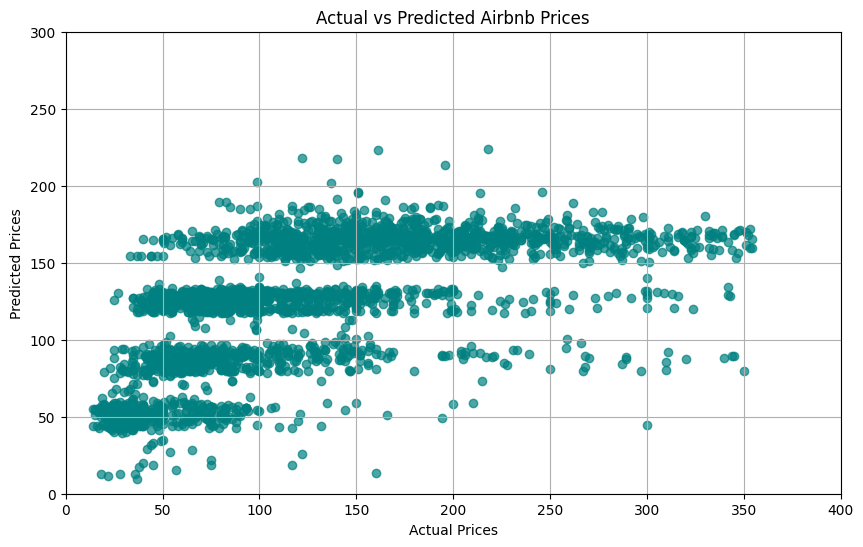

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.xlim(0, 400)  
plt.ylim(0, 300)
plt.title("Actual vs Predicted Airbnb Prices")
plt.grid(True)
plt.show()


In [ ]:

error_df = X_test.copy()
error_df['Actual Price'] = y_test
error_df['Predicted Price'] = y_pred
error_df['Error'] = abs(error_df['Actual Price'] - error_df['Predicted Price'])
top_5_errors = error_df.sort_values(by='Error', ascending=False).head(5)
print("\nTop 5 Wrong Predictions:")
print(top_5_errors[['Actual Price', 'Predicted Price', 'Error']])


Top 5 Wrong Predictions:
      Actual Price  Predicted Price        Error
2419          70.0      -938.096956  1008.096956
7717          97.0      -338.510304   435.510304
9316          81.0      -229.622493   310.622493
4421         350.0        79.516791   270.483209
568          345.0        89.383395   255.616605


In [64]:
#This next part is the samething but filtered by neighborhood

In [ ]:

room_dummies = pd.get_dummies(neighbourhood_df['room_type'], prefix='room')


neighbourhood_df = pd.concat([neighbourhood_df, room_dummies], axis=1)



In [ ]:
# Define features and target
feature_cols = ['number_of_reviews', 'minimum_nights', 'availability_365',
                'room_Entire home/apt', 'room_Private room', 'room_Shared room', 'room_Hotel room']

X = neighbourhood_df[feature_cols]
y = neighbourhood_df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

In [ ]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 4701.36
R^2 Score: 0.35


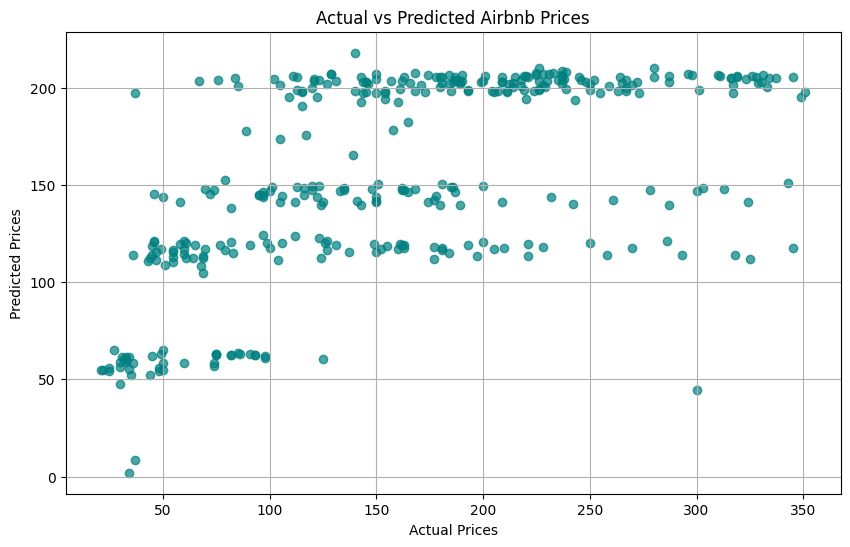

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
#plt.xlim(0, 400)  
#plt.ylim(0, 300)
plt.title("Actual vs Predicted Airbnb Prices")
plt.grid(True)
plt.show()

In [ ]:

error_df = X_test.copy()
error_df['Actual Price'] = y_test
error_df['Predicted Price'] = y_pred
error_df['Error'] = abs(error_df['Actual Price'] - error_df['Predicted Price'])
top_5_errors = error_df.sort_values(by='Error', ascending=False).head(5)
print("\nTop 5 Wrong Predictions:")
print(top_5_errors[['Actual Price', 'Predicted Price', 'Error']])


Top 5 Wrong Predictions:
       Actual Price  Predicted Price       Error
7029          316.0       154.230998  161.769002
2829          354.0       197.460762  156.539238
18809          44.0       199.899636  155.899636
19378         351.0       204.733711  146.266289
4357           60.0       203.095967  143.095967


In [70]:
#this is looking at each room type

In [ ]:

features = ['number_of_reviews', 'minimum_nights', 'availability_365']
X = room_type_df[features]
y = room_type_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 3924.03
R^2 Score: 0.16


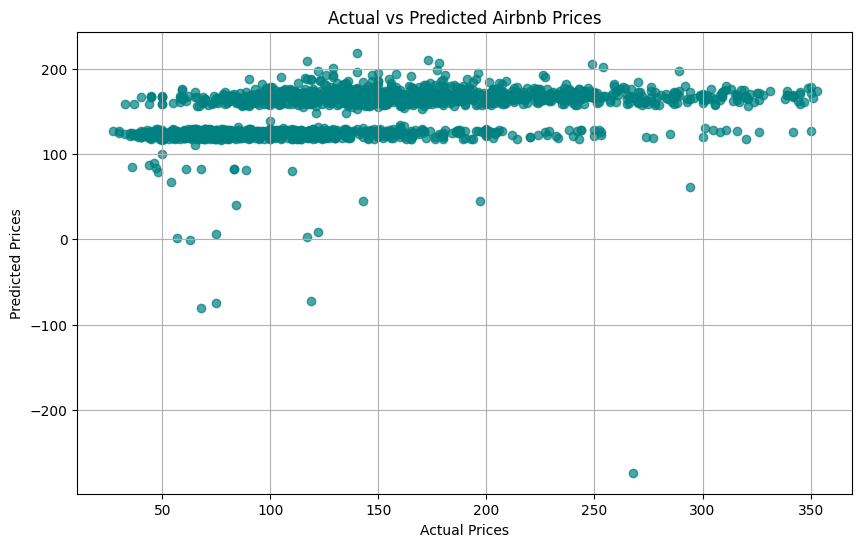

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
#plt.xlim(0, 400)  
#plt.ylim(0, 300)
plt.title("Actual vs Predicted Airbnb Prices")
plt.grid(True)
plt.show()

In [ ]:

error_df = X_test.copy()
error_df['Actual Price'] = y_test
error_df['Predicted Price'] = y_pred
error_df['Error'] = abs(error_df['Actual Price'] - error_df['Predicted Price'])
top_5_errors = error_df.sort_values(by='Error', ascending=False).head(5)
print("\nTop 5 Wrong Predictions:")
print(top_5_errors[['Actual Price', 'Predicted Price', 'Error']])


Top 5 Wrong Predictions:
       Actual Price  Predicted Price       Error
9728          268.0      -273.583031  541.583031
17022         294.0        61.895622  232.104378
6803          350.0       127.571454  222.428546
15688         342.0       126.338758  215.661242
14424         320.0       117.525999  202.474001


In [75]:
#This time it is filtered by neighborhood and room type


In [ ]:

feature_cols = ['number_of_reviews', 'minimum_nights', 'availability_365']

X = neighbourhood_roomtype_df[feature_cols]
y = neighbourhood_roomtype_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 4104.35
R^2 Score: 0.11


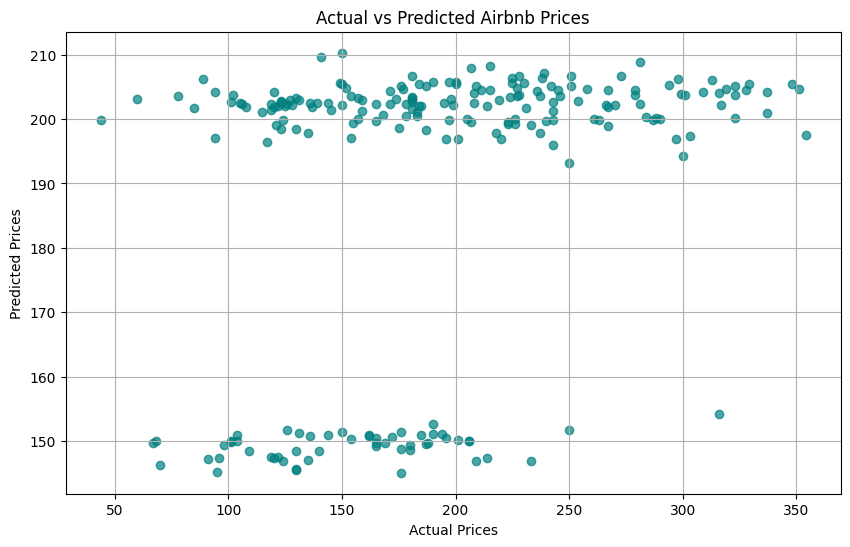

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
#plt.xlim(0, 400)  
#plt.ylim(0, 300)
plt.title("Actual vs Predicted Airbnb Prices")
plt.grid(True)
plt.show()

In [ ]:

error_df = X_test.copy()
error_df['Actual Price'] = y_test
error_df['Predicted Price'] = y_pred
error_df['Error'] = abs(error_df['Actual Price'] - error_df['Predicted Price'])
top_5_errors = error_df.sort_values(by='Error', ascending=False).head(5)
print("\nTop 5 Wrong Predictions:")
print(top_5_errors[['Actual Price', 'Predicted Price', 'Error']])


Top 5 Wrong Predictions:
       Actual Price  Predicted Price       Error
7029          316.0       154.230998  161.769002
2829          354.0       197.460762  156.539238
18809          44.0       199.899636  155.899636
19378         351.0       204.733711  146.266289
4357           60.0       203.095967  143.095967
